## Wine Quality Prediction 

##### This project aims to predict the quality of wine based on its chemical properties using machine learning models.
##### The dataset contains various features such as acidity, density, and other chemical compositions that contribute to the wine's quality.
##### Three different classifier models are used to analyze and predict wine quality:
##### Random Forest Classifier (RF)
##### Stochastic Gradient Descent Classifier (SGD)
##### Support Vector Classifier (SVC)

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Loading the Dataset

In [4]:
wine_dataset=pd.read_csv(r'/Users/daniellaiwagoh/Downloads/WineQT.csv')

### Checking Dataset Shape and Content

In [6]:
wine_dataset.shape

(1143, 13)

In [8]:
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


### Data Exploration

In [10]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [12]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


### Checking For Null Values

In [14]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

### Data Visualization 

### Countplot showing the distribution of the quality column in the dataset

<Axes: xlabel='quality', ylabel='count'>

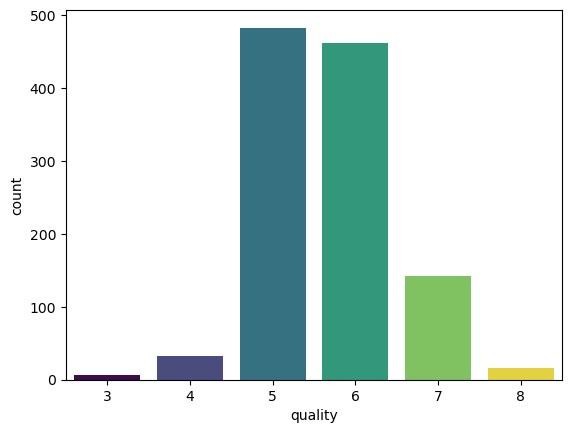

In [18]:
sns.countplot(x="quality", data=wine_dataset,hue='quality', palette='viridis', legend=False)

### Barplot showing the average fixed acidity values for each quality level in the dataset

<Axes: xlabel='quality', ylabel='fixed acidity'>

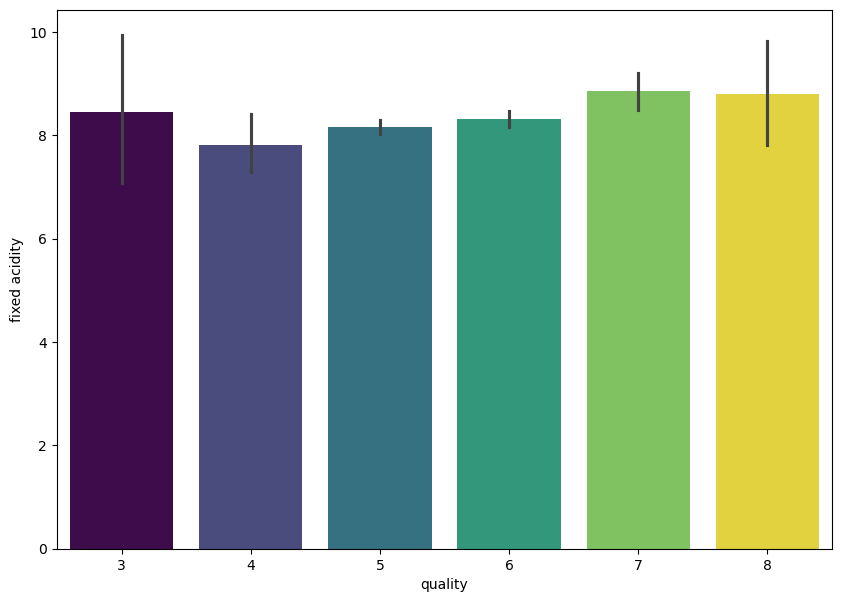

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='fixed acidity',data=wine_dataset,hue='quality', palette='viridis', legend=False)

### Barplot showing the average volatile acidity values for each quality level in the dataset

<Axes: xlabel='quality', ylabel='volatile acidity'>

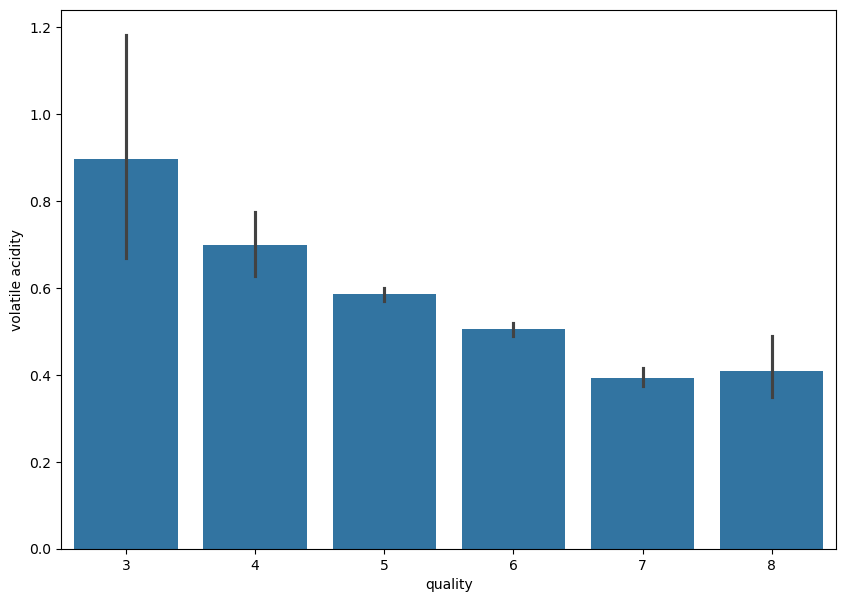

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

### Barplot showing the average citric acid values for each quality level in the dataset

<Axes: xlabel='quality', ylabel='citric acid'>

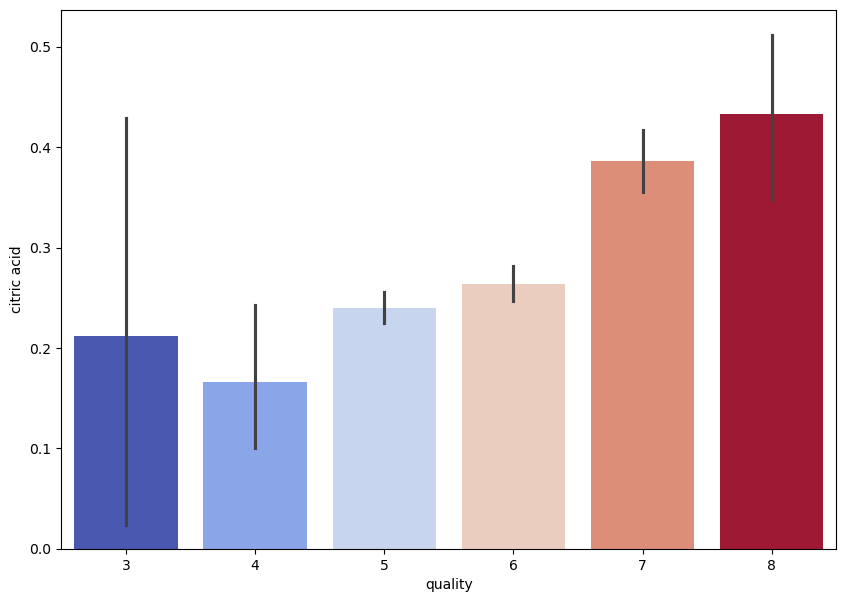

In [32]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='citric acid',data=wine_dataset,hue='quality', palette='coolwarm', legend=False)


### Correlation heatmap showing the correlation coefficients between every pair of numerical features in the dataset

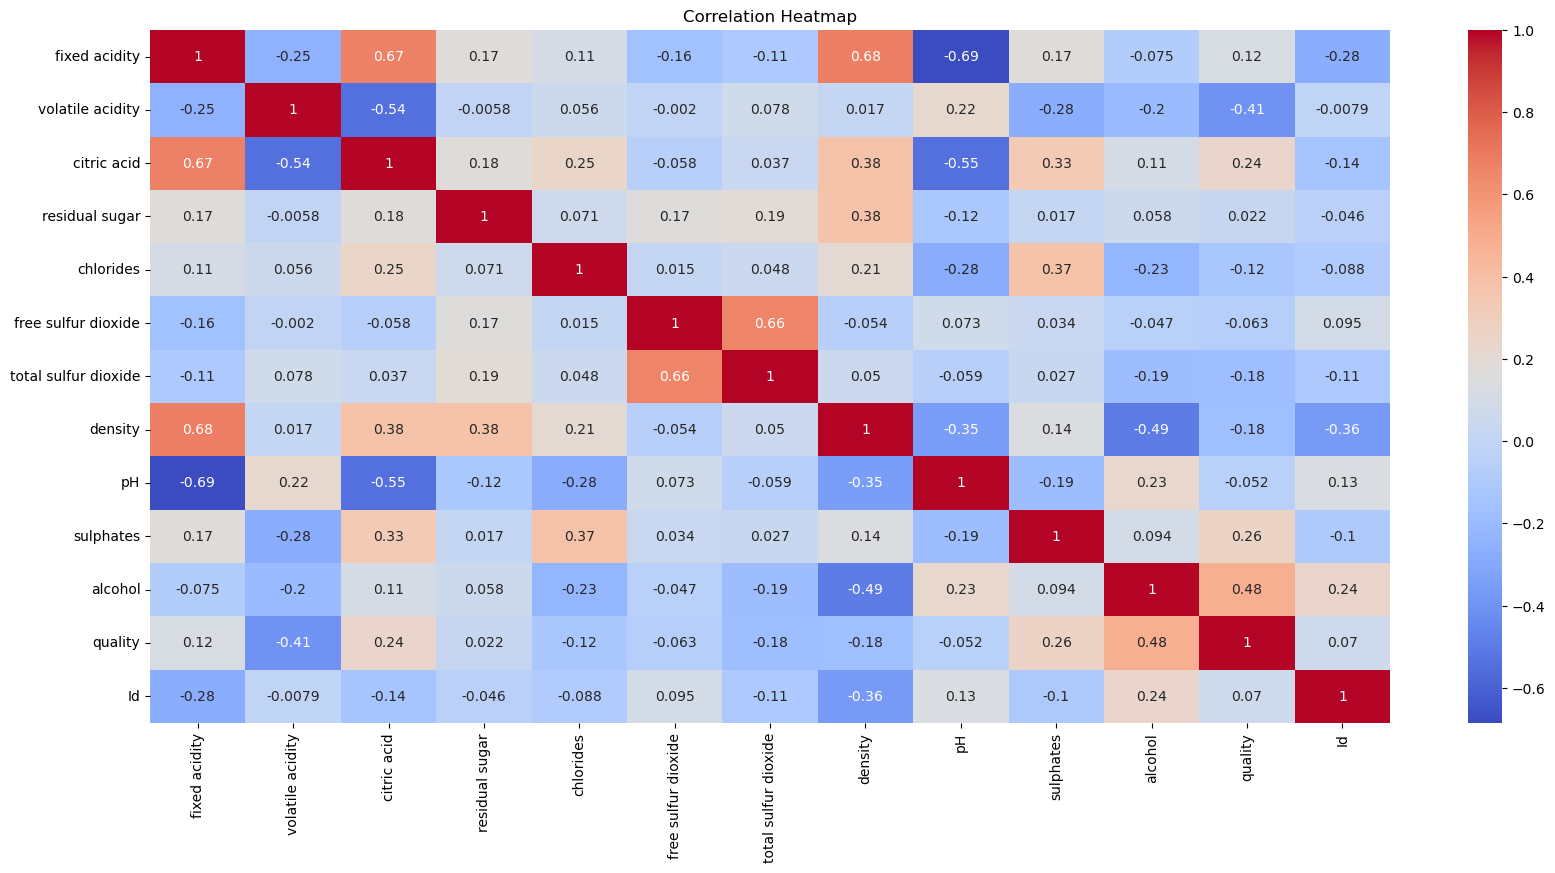

In [34]:
plt.figure(figsize=(20,9))
sns.heatmap(wine_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Boxplot showing the distribution of density values for different quality levels in the dataset

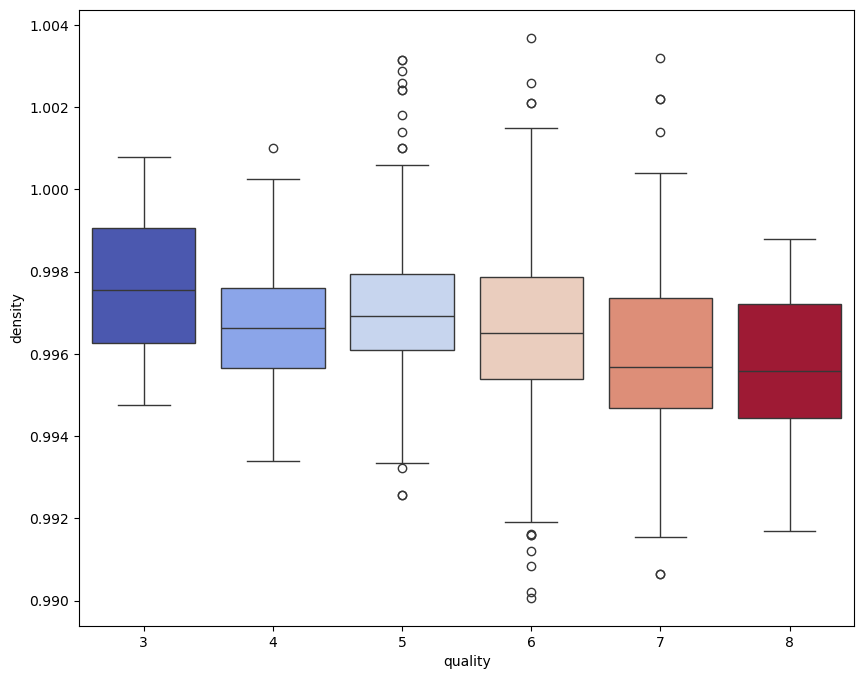

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(x="quality", y="density", data=wine_dataset, hue='quality', palette='coolwarm', legend=False)
plt.show()

### Data Preparation

In [54]:
X = wine_dataset.drop('quality', axis=1)

In [56]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1595


In [58]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [60]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

### Spliting the Data

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [66]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


### Model Training

In [126]:
rf_model = RandomForestClassifier(random_state=10)
sgd_model = SGDClassifier(random_state=10)
svc_model = SVC(random_state=10)

In [128]:
rf_model.fit(X_train, Y_train)
sgd_model.fit(X_train, Y_train)
svc_model.fit(X_train, Y_train)

SVC(random_state=10)

### Testing and Evaluating the Model

In [130]:
rf_pred = rf_model.predict(X_test)
sgd_pred = sgd_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

In [132]:
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
accuracy_sgd = accuracy_score(Y_test, Y_pred_sgd)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)

### Checking the Accuracy

In [136]:
print ("Random Forest Classifier Accuracy:", accuracy_rf)
print ("Stochastic Gradient Descent Classifier Accuracy :",accuracy_sgd)
print("Support Vector Classifier Accuracy:",accuracy_svc)

Random Forest Classifier Accuracy: 0.8908296943231441
Stochastic Gradient Descent Classifier Accuracy : 0.8122270742358079
Support Vector Classifier Accuracy: 0.8209606986899564


### Classification Report

In [148]:
classification_rf = classification_report(Y_test, rf_pred, zero_division=0)
classification_sgd = classification_report(Y_test, sgd_pred, zero_division=0)
classification_svc = classification_report(Y_test, svc_pred, zero_division=0)


In [150]:
print("Random Forest Classification Report:", classification_rf)
print("\nStochastic Gradient Descent Classification Report:", classification_sgd)
print("\nSupport Vector Classification Report:", classification_svc)

Random Forest Classification Report:               precision    recall  f1-score   support

           0       0.90      0.98      0.94       188
           1       0.83      0.49      0.62        41

    accuracy                           0.89       229
   macro avg       0.87      0.73      0.78       229
weighted avg       0.89      0.89      0.88       229


Stochastic Gradient Descent Classification Report:               precision    recall  f1-score   support

           0       0.83      0.98      0.90       188
           1       0.33      0.05      0.09        41

    accuracy                           0.81       229
   macro avg       0.58      0.51      0.49       229
weighted avg       0.74      0.81      0.75       229


Support Vector Classification Report:               precision    recall  f1-score   support

           0       0.82      1.00      0.90       188
           1       0.00      0.00      0.00        41

    accuracy                           0.82       229


### Confusion Matrix

In [152]:
confusion_rf = confusion_matrix(Y_test, rf_pred)
confusion_sgd = confusion_matrix(Y_test, sgd_pred)
confusion_svc = confusion_matrix(Y_test, svc_pred)

In [156]:
print("Random Forest Confusion Matrix:",confusion_rf)
print("\nStochastic Gradient Descent Confusion Matrix:",confusion_sgd)
print("\nSupport Vector Classification Confusion Matrix:",confusion_svc)

Random Forest Confusion Matrix: [[184   4]
 [ 21  20]]

Stochastic Gradient Descent Confusion Matrix: [[184   4]
 [ 39   2]]

Support Vector Classification Confusion Matrix: [[188   0]
 [ 41   0]]
